In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from openpyxl import load_workbook

________________________________________________________________________________________________________
________________________________________________________________________________________________________
PROBLEM SET 1
________________________________________________________________________________________________________
________________________________________________________________________________________________________

Problem 9

In [32]:
#constantes
R = 8.314 #J/k.mol
H_al = 0
H_ni = 0

In [33]:
#subfunciones
#Gibbs energy of Al in gamma phase
def G_gamma_al(T):
    return -11278.378+(188.684153*T)-(31.748192*T*np.log(T))-(1.231e28*T**(-9))
#Gibbs energy of Ni in gamma phase
def G_gamma_ni(T):
    return -5179.159+(117.854*T)-(22.096*T*np.log(T))-(0.004807*T**2)
#L parameter for gamma phase
def L_al_ni_gamma(T,x_al_gamma):
    x_ni_gamma = 1-x_al_gamma
    return -168750+(16*T)+(30600*(x_al_gamma-x_ni_gamma))+(41700*(x_al_gamma-x_ni_gamma)**2)
#Gibbs energy of AlNi in gamma phase
def G_ni_al_gamma_prime(T):
    return (0.75*G_gamma_ni(T))-40000+(3*T)+(0.25*G_gamma_al(T))

In [34]:
#funciones
#funcion for the Gibbs energy of the gamma phase
def G_m_gamma(T,x_al_gamma):
    x_ni_gamma = 1-x_al_gamma #molar fractions
    #Gibbs reference contribution
    G_m_ref_gamma = (x_al_gamma*(G_gamma_al(T)-H_al))+(x_ni_gamma*(G_gamma_ni(T)-H_ni))
    #Gibbs entropy contribution
    G_m_ent_gamma = R * T * (x_al_gamma * np.log(x_al_gamma) + x_ni_gamma * np.log(x_ni_gamma))
    #Gibbs excess contribution
    G_m_E_gamma = x_al_gamma*x_ni_gamma*L_al_ni_gamma(T,x_al_gamma)
    
    return G_m_ref_gamma+G_m_ent_gamma+G_m_E_gamma

#function for the Gibbs energy of the gamma prime phase
def G_m_gamma_prime(T):
    return G_ni_al_gamma_prime(T)

In [35]:
#fracciones
#values for the Al molar fraction
x_al = np.linspace(0.001, 0.999, 50)
#Temperatures in K
Temp = [500, 700, 900, 1100, 1300]

In [6]:
#Calculating the Gibbs energy for gamma and gamma prime phases
for T in Temp:
    G_gamma = G_m_gamma(T, x_al)
    G_gamma_prime = G_m_gamma_prime(T)

In [7]:
G_gamma

array([ -66271.18746673,  -69988.59482741,  -73392.5544188 ,
        -76626.95427663,  -79718.25132339,  -82673.59240465,
        -85493.2358932 ,  -88174.40885004,  -90712.9167444 ,
        -93103.9380465 ,  -95342.46247237,  -97423.55267681,
        -99342.51015763, -101094.98545346, -102677.05411041,
       -104085.27064417, -105316.70781182, -106368.9857508 ,
       -107240.29392375, -107929.40781833, -108435.7017251 ,
       -108759.15850794, -108900.37700635, -108860.57751824,
       -108641.60567487, -108245.93491764, -107676.66770556,
       -106937.53551536, -106032.89763381, -104967.73868112,
       -103747.66473584, -102378.89785219, -100868.26865766,
        -99223.20658269,  -97451.72708271,  -95562.41493836,
        -93564.40231064,  -91467.33960192,  -89281.35618419,
        -87017.00643689,  -84685.19378029,  -82297.06047765,
        -79863.82173104,  -77396.50398831,  -74905.50669831,
        -72399.80771812,  -69885.35359302,  -67361.20239552,
        -64807.10212121,

In [8]:
G_gamma_prime

-101119.77200499325

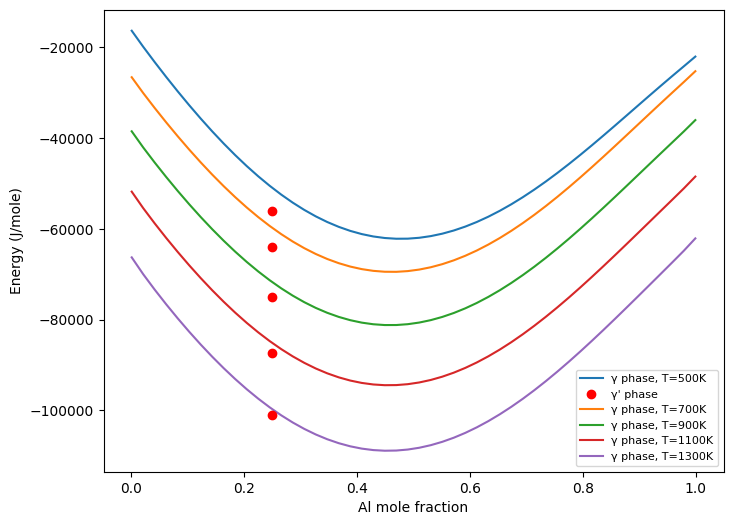

In [75]:
#Plotting the gamma and gamma prime phases
plt.figure(figsize=(8,6))
for T in Temp:
    G_gamma = G_m_gamma(T, x_al)
    G_gamma_prime = G_m_gamma_prime(T)

    #plt.plot(x_al,G_gamma)
    plt.plot(x_al,G_gamma, label=f'γ phase, T={T}K')
    plt.plot(0.25, G_gamma_prime, 'ro', markersize=6, label=f"γ' phase" if T == Temp[0] else "")
    
    plt.xlabel('Al mole fraction')
    plt.ylabel('Energy (J/mole)')
    plt.legend(loc='lower right', fontsize=8)
plt.savefig('gamma_plot.jpg')

T=500K: Boundary at x_Al = 0.4083
T=700K: Boundary at x_Al = 0.3880
T=900K: Boundary at x_Al = 0.3676
T=1100K: Boundary at x_Al = 0.3472
T=1300K: Boundary at x_Al = 0.3269


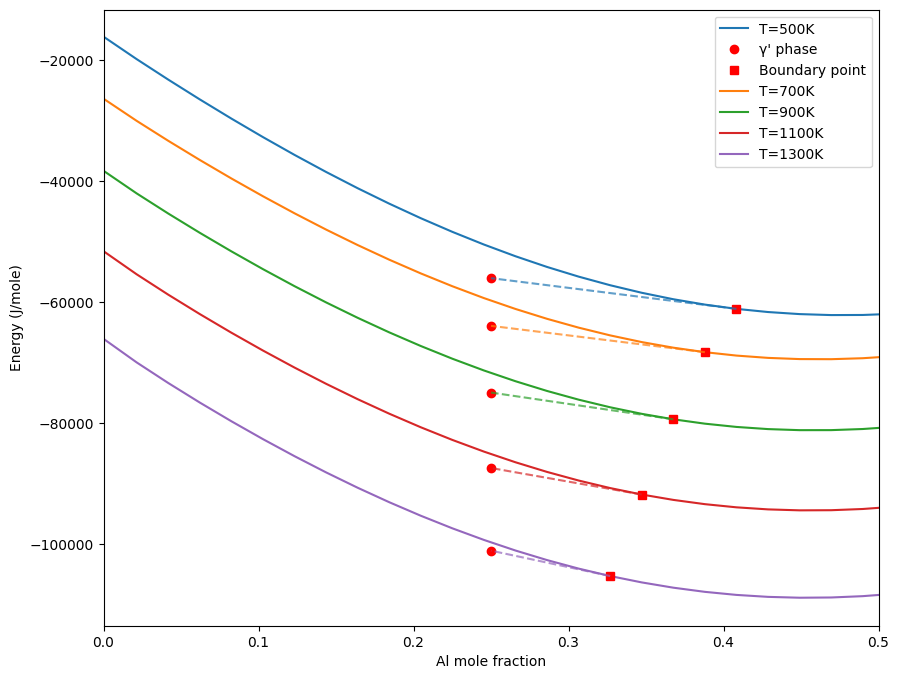

In [78]:
#finding the gamma/(gamma+gammaa') -> this would be a tangent between the gamma and gamma'
plt.figure(figsize=(10, 8))

for T in Temp:
    G_gamma = G_m_gamma(T, x_al)
    G_gamma_prime = G_m_gamma_prime(T)
    
    #need the Al-rich side for the gamma/(gamma+gamma') boundary
    compositions = x_al > 0.25 #array with true for compositions higher 0.25 and false
    x_al_right = x_al[compositions] #keep the compositions that are higher than 0.25
    G_gamma_right = G_gamma[compositions] #Gibbs eneregies for compositions higher than 0.25
    
    #calculating the slope for the gamma/(gamma+gamma')
    slopes = (G_gamma_prime - G_gamma_right) / (0.25 - x_al_right) #calculating the slope for the line that connects to the gamma' point
    dG_dx = np.gradient(G_gamma_right, x_al_right) #dervative of the gamma curve at each point
    diff = np.abs(dG_dx - slopes) #difference bewteen the derivative and the slope
    min_idx = np.argmin(diff) #find the minimum of the difference
    
    #finding the compositions and energy at the boundary point and the phase boundary composition
    x_boundary = x_al_right[min_idx]
    G_boundary = G_gamma_right[min_idx]
    
    #plotting the results
    line = plt.plot(x_al, G_gamma, label=f'T={T}K')[0] #plotting the Gibbs energy of the gamma phase
    plt.plot(0.25, G_gamma_prime, 'ro', markersize=6, label=f"γ' phase" if T == Temp[0] else "")  # plotting the gamma' points 
    plt.plot(x_boundary, G_boundary, 'rs', markersize=6, label=f"Boundary point" if T == Temp[0] else "") #plotting the boundary points
    plt.plot([x_boundary, 0.25], [G_boundary, G_gamma_prime], '--', color=line.get_color(), alpha=0.7) #plotting common tangent line
    
    print(f"T={T}K: Boundary at x_Al = {x_boundary:.4f}")

plt.xlabel('Al mole fraction')
plt.ylabel('Energy (J/mole)')
plt.legend()
plt.xlim(0, 0.5)
plt.savefig('boundary_plot.jpg')

________________________________________________________________________________________________________
________________________________________________________________________________________________________
PROBLEM SET 2
________________________________________________________________________________________________________
________________________________________________________________________________________________________

Problem 3

In [10]:
#constants and initial values
wavelength = 1.5418 #in angstrom
twotheta_gamma_prime = np.array([24.73, 35.32, 43.66, 50.83, 57.40, 63.51, 74.81, 80.30, 85.63, 90.94, 96.25, 101.60, 107.10, 118.61])
twotheta_gamma = np.array([43.68, 50.84, 74.85, 90.97, 96.30, 118.68])

In [11]:
#calculating d
#grad to rad
def find_a(two_theta):
    #calculating theta in rad
    theta = np.radians(two_theta/2)
    #calculating d
    d = wavelength/(2*np.sin(theta))
    #setting a range for the values of lattice parameter, a, for testing
    a_test = np.linspace(3.50, 3.65, 1001) #this values are to have a range that covers tipycal lattice parameter vallues
    
    #calculating the error for the test values of a
    total_error = []
    for a in a_test:
        N_calc = (a/d)**2
        #difference of each value from the nearest integer
        error = np.sum((N_calc - np.round(N_calc))**2)
        total_error.append(error)
    
    #determining the best a value with the min error
    best_a_indx = np.argmin(total_error) #indice del min valor de a
    a_optim = a_test[best_a_indx] #valor de a optimo para el siguiente calculo

    #with the best a value, now we calculate N and find the a value for this N
    N = np.round((a_optim/d)**2).astype(int)
    a_new = d*np.sqrt(N) #nuevo valor para a para cada pico
    a = np.mean(a_new) #promedio de a de todos los picos

    #creating a dictionary with the hkl corresponding to N
    hkl_dict = {
        1: '100', 2: '110', 3: '111', 4: '200', 5: '210',
        6: '211', 8: '220', 9: '221', 10: '310', 11: '311',
        12: '222', 13: '320', 14: '321', 16: '400'
    }
    #extracting the hkl depending on the value of N obtained
    hkl = [hkl_dict.get(n, f'({n})') for n in N]
    
    #creating a dataframe to show the information
    results_df = pd.DataFrame({
        '2θ (deg)': two_theta,
        'd (Å)': d,
        'N': N,
        'hkl': hkl,
        'a (Å)': a,
        '1/d': 1/d
    })

    return a, results_df

In [12]:
#a value for gamma prime
#find_a(twotheta_gamma_prime)[1]
find_a(twotheta_gamma_prime)

(3.5892408596975325,
     2θ (deg)     d (Å)   N  hkl     a (Å)       1/d
 0      24.73  3.600004   1  100  3.589241  0.277777
 1      35.32  2.541139   2  110  3.589241  0.393524
 2      43.66  2.073126   3  111  3.589241  0.482363
 3      50.83  1.796251   4  200  3.589241  0.556715
 4      57.40  1.605294   5  210  3.589241  0.622939
 5      63.51  1.464787   6  211  3.589241  0.682693
 6      74.81  1.269086   8  220  3.589241  0.787969
 7      80.30  1.195581   9  221  3.589241  0.836413
 8      85.63  1.134288  10  310  3.589241  0.881610
 9      90.94  1.081383  11  311  3.589241  0.924742
 10     96.25  1.035317  12  222  3.589241  0.965888
 11    101.60  0.994781  13  320  3.589241  1.005246
 12    107.10  0.958383  14  321  3.589241  1.043424
 13    118.61  0.896503  16  400  3.589241  1.115445)

In [13]:
#a value for gamma
find_a(twotheta_gamma)

(3.587381560268294,
    2θ (deg)     d (Å)   N  hkl     a (Å)       1/d
 0     43.68  2.072223   3  111  3.587382  0.482574
 1     50.84  1.795921   4  200  3.587382  0.556817
 2     74.85  1.268507   8  220  3.587382  0.788328
 3     90.97  1.081105  11  311  3.587382  0.924980
 4     96.30  1.034912  12  222  3.587382  0.966265
 5    118.68  0.896178  16  400  3.587382  1.115850)

In [14]:
#gamma_prime = find_a(twotheta_gamma_prime)[1]
#gamma_prime["1/d"] = 1/gamma_prime["d (Å)"]
#gamma_prime

________________________________________________________________________________________________________
________________________________________________________________________________________________________
PROBLEM SET 3
________________________________________________________________________________________________________
________________________________________________________________________________________________________

Problem 1

In [15]:
'''Problem 1'''
#parameter
R = np.linspace(0.1,1,1000) # set the values that R can take

In [16]:
#radial stress
sigma_radial_R = (5/15)*((101/100)-(1/(100*R**2))-R**2)
sigma_hoop_R = (5/15)*((101/100)-(1/(100*R**2))-((3/5)*R**2))

In [17]:
#finding the maximum values
max_radial = np.max(sigma_radial_R)
index_max_radial = R[np.argmax(sigma_radial_R)]
max_hoop = np.max(sigma_hoop_R)
index_max_hoop = R[np.argmax(sigma_hoop_R)]
max_vals = [max_radial, max_hoop]
max_vals

[0.26999999982212963, 0.28502686941930144]

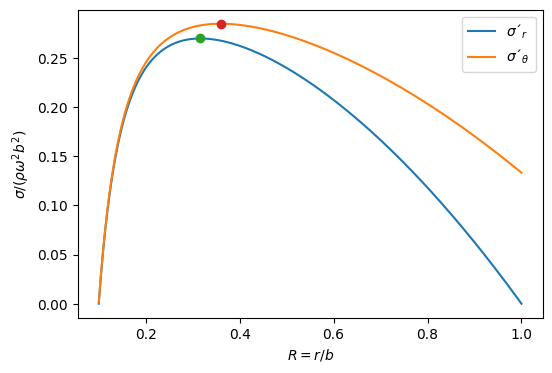

In [18]:
#Plotting the stresses and maximum
plt.figure(figsize=(6,4))
plt.plot(R, sigma_radial_R, label=r'$\sigma´_r$')
plt.plot(R, sigma_hoop_R, label=r'$\sigma´_\theta$')
plt.plot(index_max_radial,max_radial, 'o')
plt.plot(index_max_hoop,max_hoop, 'o')
plt.xlabel(r'$R=r/b$')
plt.ylabel(r'$\sigma/(\rho\omega^2 b^2)$')
plt.legend()
#plt.grid(True)
plt.savefig('stress.jpg')

Problem 3

In [19]:
'''Problem 3'''

import statistics

#initial data
data = np.array([8821, 9276, 9946, 10592])
#revised data
new_data = np.array([8821, 9276, 9946, 10592, 8967])

In [20]:
#equation for safe life
def safe_life(data):
    n=np.size(data)
    res = statistics.geometric_mean(data)/(2.449*(6**(1.645/(6*np.sqrt(n)))))
    return res

In [21]:
safe_life(data)

3077.6263729597613

In [22]:
safe_life(new_data)

3113.376882704013

In [23]:
np.mean(data)

9658.75

In [24]:
np.mean(new_data)

9520.4

________________________________________________________________________________________________________
________________________________________________________________________________________________________
PROBLEM SET 4
________________________________________________________________________________________________________
________________________________________________________________________________________________________

Problem 3

i)

In [134]:
#setting the names to rename the columns to make it easier to use
names = {
    'Mole percent of Ni in FCC_A1': 'Ni_gamma',
    'Mole percent of Al in FCC_A1': 'Al_gamma',
    'Mole percent of Ta in FCC_A1': 'Ta_gamma',
    'Mole percent of Cr in FCC_A1': 'Cr_gamma',
    'Mole percent of Co in FCC_A1': 'Co_gamma',
    'Mole percent of Mo in FCC_A1': 'Mo_gamma',
    'Mole percent of Re in FCC_A1': 'Re_gamma',
    'Mole percent of W in FCC_A1': 'W_gamma',
    'Mole percent of Ni in GAMMA_PRIME': 'Ni_gammaprime',
    'Mole percent of Al in GAMMA_PRIME': 'Al_gammaprime',
    'Mole percent of Ta in GAMMA_PRIME': 'Ta_gammaprime',
    'Mole percent of Cr in GAMMA_PRIME': 'Cr_gammaprime',
    'Mole percent of Co in GAMMA_PRIME': 'Co_gammaprime',
    'Mole percent of Mo in GAMMA_PRIME': 'Mo_gammaprime',
    'Mole percent of Re in GAMMA_PRIME': 'Re_gammaprime',
    'Mole percent of W in GAMMA_PRIME': 'W_gammaprime'
}

In [145]:
#function to change the names of the columns to work with
def rename_alloy_columns(df, rename_map):
    return df.rename(columns=rename_map)

In [ ]:
#importing the results obtained from thermocalc for the Ni-Al-Ta
df_ta_01 = pd.read_excel('Q3_results01.xls')
df_ta = rename_alloy_columns(df_ta_01, names)

In [137]:
#funciones para calcular a_gamma y a_gammaprime
def a_gamma(row):
    return (3.523 + 0.179*row.get('Al_gamma',0) + 0.700*row.get('Ta_gamma',0) + 0.110*row.get('Cr_gamma',0) + 0.444*row.get('W_gamma',0) + 0.441*row.get('Re_gamma',0) + 0.478*row.get('Mo_gamma',0) + 0.096*row.get('Co_gamma',0))

def a_gamma_prime(row):
    return (3.558 + 0.500*row.get('Ta_gammaprime',0) - 0.004*row.get('Cr_gammaprime',0) + 0.194*row.get('W_gammaprime',0) + 0.262*row.get('Re_gammaprime',0) + 0.208*row.get('row.Mo_gammaprime',0))

In [184]:
#funcion para calcular lattice misfit
def delta(row):
    return(np.abs(2*((row.a_gammaprime-row.a_gamma)/(row.a_gammaprime+row.a_gamma))))

In [185]:
#function to perform all calculations
def calculations(dataframe):
    dataframe['a_gamma'] = dataframe.apply(a_gamma, axis=1)
    dataframe['a_gammaprime'] = dataframe.apply(a_gamma_prime, axis=1)
    dataframe['delta'] = dataframe.apply(delta, axis=1)
    return dataframe

In [186]:
df_ta = calculations(df_ta)
df_ta

,Mole percent Ni,Mole percent Al,Mole percent Ta,Mole percent of Ni in ETA,Mole percent of Al in ETA,Mole percent of Ta in ETA,Ni_gamma,Al_gamma,Ta_gamma,Ni_gammaprime,Al_gammaprime,Ta_gammaprime,Mole percent of Ni in NI3NB,Mole percent of Al in NI3NB,Mole percent of Ta in NI3NB,a_gamma,a_gammaprime,delta
0,80.395950,17.604050,2.000000e+00,NaN,NaN,NaN,86.329743,13.173801,4.964565e-01,78.418019,19.080800,2.501181e+00,NaN,NaN,NaN,6.228630,4.808591,0.257318
1,81.116318,15.883682,3.000000e+00,NaN,NaN,NaN,87.210251,11.564594,1.225156e+00,79.085007,17.323378,3.591615e+00,NaN,NaN,NaN,6.450671,5.353807,0.185839
2,81.631585,14.368415,4.000000e+00,NaN,NaN,NaN,87.893388,9.787951,2.318661e+00,79.544317,15.895237,4.560446e+00,NaN,NaN,NaN,6.898106,5.838223,0.166435
3,81.900059,13.099941,5.000000e+00,NaN,NaN,NaN,88.264390,8.085708,3.649902e+00,79.778616,14.771352,5.450033e+00,NaN,NaN,NaN,7.525273,6.283016,0.179929
4,81.937757,12.062243,6.000000e+00,NaN,NaN,NaN,88.302098,6.609077,5.088825e+00,79.816311,13.879964,6.303725e+00,NaN,NaN,NaN,8.268202,6.709863,0.208083
5,81.782944,11.217056,7.000000e+00,NaN,NaN,NaN,88.034759,5.411804,6.553437e+00,79.699005,13.152141,7.148854e+00,NaN,NaN,NaN,9.079119,7.132427,0.240161
6,81.478173,10.521827,8.000000e+00,NaN,NaN,NaN,87.513326,4.483305,8.003370e+00,79.466456,12.534667,7.998877e+00,NaN,NaN,NaN,9.927870,7.557438,0.271134
7,81.156165,10.051732,8.792103e+00,NaN,NaN,NaN,86.957226,3.912310,9.130465e+00,79.222478,12.098206,8.679316e+00,NaN,NaN,NaN,10.614629,7.897658,0.293532
8,81.156165,10.051732,8.792103e+00,79.216506,9.471589,11.311905,86.957226,3.912310,9.130465e+00,79.222478,12.098206,8.679316e+00,NaN,NaN,NaN,10.614629,7.897658,0.293532
9,81.155693,9.844307,9.000000e+00,79.216506,9.471589,11.311905,86.957226,3.912310,9.130465e+00,79.222478,12.098206,8.679316e+00,NaN,NaN,NaN,10.614629,7.897658,0.293532


In [187]:
res_ta = df_ta[['Ni_gamma', 'Al_gamma', 'Ta_gamma', 'Ni_gammaprime', 'Al_gammaprime', 'Ta_gammaprime', 'a_gamma', 'a_gammaprime', 'delta']].dropna()

In [188]:
res_ta

,Ni_gamma,Al_gamma,Ta_gamma,Ni_gammaprime,Al_gammaprime,Ta_gammaprime,a_gamma,a_gammaprime,delta
0,86.329743,13.173801,4.964565e-01,78.418019,19.080800,2.501181e+00,6.228630,4.808591,0.257318
1,87.210251,11.564594,1.225156e+00,79.085007,17.323378,3.591615e+00,6.450671,5.353807,0.185839
2,87.893388,9.787951,2.318661e+00,79.544317,15.895237,4.560446e+00,6.898106,5.838223,0.166435
3,88.264390,8.085708,3.649902e+00,79.778616,14.771352,5.450033e+00,7.525273,6.283016,0.179929
4,88.302098,6.609077,5.088825e+00,79.816311,13.879964,6.303725e+00,8.268202,6.709863,0.208083
5,88.034759,5.411804,6.553437e+00,79.699005,13.152141,7.148854e+00,9.079119,7.132427,0.240161
6,87.513326,4.483305,8.003370e+00,79.466456,12.534667,7.998877e+00,9.927870,7.557438,0.271134
7,86.957226,3.912310,9.130465e+00,79.222478,12.098206,8.679316e+00,10.614629,7.897658,0.293532
8,86.957226,3.912310,9.130465e+00,79.222478,12.098206,8.679316e+00,10.614629,7.897658,0.293532
9,86.957226,3.912310,9.130465e+00,79.222478,12.098206,8.679316e+00,10.614629,7.897658,0.293532


In [189]:
#this is to save the result in latex format so that I can use it in my report
def save_latex(df):
    df = df.round(2).to_latex(index=False, float_format="%.2f")
    return df

In [190]:
save_latex(res_ta)

'\\begin{tabular}{rrrrrrrrr}\n\\toprule\nNi_gamma & Al_gamma & Ta_gamma & Ni_gammaprime & Al_gammaprime & Ta_gammaprime & a_gamma & a_gammaprime & delta \\\\\n\\midrule\n86.33 & 13.17 & 0.50 & 78.42 & 19.08 & 2.50 & 6.23 & 4.81 & 0.26 \\\\\n87.21 & 11.56 & 1.23 & 79.09 & 17.32 & 3.59 & 6.45 & 5.35 & 0.19 \\\\\n87.89 & 9.79 & 2.32 & 79.54 & 15.90 & 4.56 & 6.90 & 5.84 & 0.17 \\\\\n88.26 & 8.09 & 3.65 & 79.78 & 14.77 & 5.45 & 7.53 & 6.28 & 0.18 \\\\\n88.30 & 6.61 & 5.09 & 79.82 & 13.88 & 6.30 & 8.27 & 6.71 & 0.21 \\\\\n88.03 & 5.41 & 6.55 & 79.70 & 13.15 & 7.15 & 9.08 & 7.13 & 0.24 \\\\\n87.51 & 4.48 & 8.00 & 79.47 & 12.53 & 8.00 & 9.93 & 7.56 & 0.27 \\\\\n86.96 & 3.91 & 9.13 & 79.22 & 12.10 & 8.68 & 10.61 & 7.90 & 0.29 \\\\\n86.96 & 3.91 & 9.13 & 79.22 & 12.10 & 8.68 & 10.61 & 7.90 & 0.29 \\\\\n86.96 & 3.91 & 9.13 & 79.22 & 12.10 & 8.68 & 10.61 & 7.90 & 0.29 \\\\\n86.96 & 3.91 & 9.13 & 79.22 & 12.10 & 8.68 & 10.61 & 7.90 & 0.29 \\\\\n86.96 & 3.91 & 9.13 & 79.22 & 12.10 & 8.68 & 10.61 & 7

ii)

In [191]:
#importing the data for the molar fraction of the systems to analyze (Ni-Al-Ta-X), where X is Cr, Mo, Re and W
df_cr_01 = pd.read_excel('Q3_results03_Cr.xls')
df_cr = rename_alloy_columns(df_cr_01, names)
df_mo_01 = pd.read_excel('Q3_results03_mo.xls')
df_mo = rename_alloy_columns(df_mo_01, names)
df_re_01 = pd.read_excel('Q3_results03_re.xls')
df_re = rename_alloy_columns(df_re_01, names)
df_w_01 = pd.read_excel('Q3_results03_w.xls')
df_w = rename_alloy_columns(df_w_01, names)

In [192]:
#calculating a_gamma, a_gammaprime and delta
df_cr = calculations(df_cr)
df_mo = calculations(df_mo)
df_re = calculations(df_re)
df_w = calculations(df_w)

In [193]:
res_cr = df_cr[['Ni_gamma', 'Al_gamma', 'Ta_gamma', 'Cr_gamma', 'Ni_gammaprime', 'Al_gammaprime', 'Ta_gammaprime', 'Cr_gammaprime', 'a_gamma', 'a_gammaprime', 'delta']].dropna()
res_mo = df_mo[['Ni_gamma', 'Al_gamma', 'Ta_gamma', 'Mo_gamma', 'Ni_gammaprime', 'Al_gammaprime', 'Ta_gammaprime', 'Mo_gammaprime', 'a_gamma', 'a_gammaprime', 'delta']].dropna()
res_re = df_re[['Ni_gamma', 'Al_gamma', 'Ta_gamma', 'Re_gamma', 'Ni_gammaprime', 'Al_gammaprime', 'Ta_gammaprime', 'Re_gammaprime', 'a_gamma', 'a_gammaprime', 'delta']].dropna()
res_w = df_w[['Ni_gamma', 'Al_gamma', 'Ta_gamma', 'W_gamma', 'Ni_gammaprime', 'Al_gammaprime', 'Ta_gammaprime', 'W_gammaprime', 'a_gamma', 'a_gammaprime', 'delta']].dropna()

In [181]:
#res_cr

In [194]:
save_latex(res_w)

'\\begin{tabular}{rrrrrrrrrrr}\n\\toprule\nNi_gamma & Al_gamma & Ta_gamma & W_gamma & Ni_gammaprime & Al_gammaprime & Ta_gammaprime & W_gammaprime & a_gamma & a_gammaprime & delta \\\\\n\\midrule\n87.22 & 11.55 & 1.23 & 0.00 & 79.08 & 17.32 & 3.59 & 0.01 & 6.45 & 5.35 & 0.19 \\\\\n87.32 & 11.30 & 1.29 & 0.08 & 79.06 & 17.20 & 3.49 & 0.25 & 6.49 & 5.35 & 0.19 \\\\\n87.41 & 11.05 & 1.36 & 0.19 & 79.04 & 17.09 & 3.41 & 0.47 & 6.53 & 5.35 & 0.20 \\\\\n87.49 & 10.78 & 1.42 & 0.31 & 79.02 & 16.97 & 3.34 & 0.67 & 6.58 & 5.36 & 0.21 \\\\\n87.55 & 10.52 & 1.48 & 0.46 & 79.00 & 16.85 & 3.27 & 0.87 & 6.64 & 5.36 & 0.21 \\\\\n87.59 & 10.24 & 1.54 & 0.63 & 78.99 & 16.73 & 3.22 & 1.07 & 6.71 & 5.37 & 0.22 \\\\\n87.62 & 9.95 & 1.60 & 0.83 & 78.97 & 16.61 & 3.17 & 1.26 & 6.80 & 5.39 & 0.23 \\\\\n87.62 & 9.65 & 1.67 & 1.07 & 78.95 & 16.48 & 3.13 & 1.44 & 6.89 & 5.40 & 0.24 \\\\\n87.59 & 9.34 & 1.73 & 1.34 & 78.92 & 16.36 & 3.09 & 1.63 & 7.00 & 5.42 & 0.25 \\\\\n87.53 & 9.01 & 1.80 & 1.66 & 78.88 & 16.2

In [199]:
#finding the min values of delta for every alloy composition
print(df_cr['delta'].min())
print(df_mo['delta'].min())
print(df_re['delta'].min())
print(df_w['delta'].min())

0.18579964657869447
0.18579964658923648
0.18579964658088424
0.1857996465827391
